# Imports

In [2]:
import pandas as pd 
import numpy as np
import glob 

In [3]:
path = '/Users/labbot/Documents/metis_bootcamp/project04/data/pitbulls'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    one_df = pd.read_csv(filename, index_col=None, header=0)
    li.append(one_df)

df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
df.shape

(141515, 20)

In [5]:
df.nunique()

body                      127239
score_hidden                   0
archived                       0
name                           0
author                     21046
author_flair_text            150
downs                          0
created_utc               141141
subreddit_id                   1
link_id                    20697
parent_id                  66056
score                        286
retrieved_on              140825
controversiality               2
gilded                         3
id                        141515
subreddit                      1
ups                            0
distinguished                  1
author_flair_css_class         0
dtype: int64

In [6]:
df.isnull().sum()

body                           1
score_hidden              141515
archived                  141515
name                      141515
author                         0
author_flair_text         137806
downs                     141515
created_utc                    0
subreddit_id                   0
link_id                        0
parent_id                      0
score                          0
retrieved_on                   0
controversiality               0
gilded                         0
id                             0
subreddit                      0
ups                       141515
distinguished             141376
author_flair_css_class    141515
dtype: int64

In [285]:
# need to drop the single row where comment body is missing
df = df.dropna(subset = ['body'])
df.shape

(20697, 5)

In [9]:
# document = all comments on a given post
df = df.groupby(['link_id'], as_index = False).agg({'body': ' '.join})
df.shape

(20697, 2)

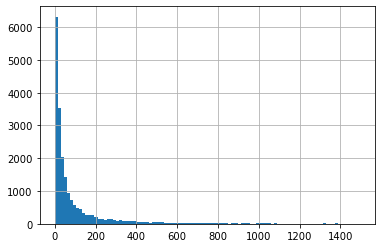

In [335]:
# check the length of newly created documents
df['doc_length'] = df['body'].str.split().str.len()
df['doc_length'][df['doc_length'] < 1500].hist(bins=100);

# Preprocessing

In [41]:
import re
import string

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

import nltk
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /Users/labbot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/labbot/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Stepwise

In [16]:
# first create a copy of the text column so we can compare to it if needed
df['body_orig'] = df['body']

### Remove numbers, capital letters, punctuation

In [18]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
breaks = lambda x: re.sub("\n", " ", x)

df['body'] = df['body'].map(alphanumeric).map(punc_lower).map(breaks)
df.tail()

,link_id,body,body_orig
20692,t3_ei9kfu,i’ll snuggle you jenny,"I’ll snuggle you, Jenny!!!"
20693,t3_ei9omv,that lip omg so cute eeeeeee so handso...,That lip!!!! Omg so cute!!! Eeeeeee. So handso...
20694,t3_ei9xrt,i love the little spots,I love the little spots :)
20695,t3_eia3h0,���� that’s going to be me too admittedly it...,"���� that’s going to be me too! Admittedly, it..."
20696,t3_eiaf39,nuggets mine was called puppy for the first ...,"Nuggets Mine was called ""puppy"" for the first ..."


In [336]:
# for body in df["body"][0:20]:
#     print(body)

### Remove Stopwords

In [20]:
# Create list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS
# figure out best way to add stopwords like: �

In [30]:
# Check what feature space looks like at this point
cv = CountVectorizer(stop_words=stop_words, min_df=5)
doc_word = cv.fit_transform(df["body"])
cv_dv = pd.DataFrame(doc_word.toarray(),columns=cv.get_feature_names())
cv_dv.head()

/Users/labbot/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,aa,aaaaand,aaaah,aaaw,aaawww,aaww,ab,abandon,abandoned,abandoning,...,zombie,zone,zoo,zoom,zoomed,zoomie,zoomies,zooming,zooms,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Lemmatize

In [37]:
lemmatizer = WordNetLemmatizer()
word_tokenizer = lambda x: word_tokenize(x)
lemmatize = lambda x: " ".join([lemmatizer.lemmatize(w) for w in x])

In [42]:
df['Lemmatized'] = df['body'].apply(word_tokenizer).apply(lemmatize)
df

,link_id,body,body_orig,Lemmatized
0,t3_8zrnvs,dude she s beautiful,"Dude, she's beautiful!",dude she s beautiful
1,t3_925zut,lol angry fair enough perish sorry thoug...,"Lol, angry? ;) Fair enough. Perish Sorry thoug...",lol angry fair enough perish sorry thought you...
2,t3_929abm,not interested in your content not interested ...,Not interested in your content not interested ...,not interested in your content not interested ...
3,t3_9cmyda,thanks for your information in baby allergies...,thanks for your information in [baby allergies...,thanks for your information in baby allergy an...
4,t3_9dv6mo,looks like all the fat in his body went to his...,Looks like all the fat in his body went to his...,look like all the fat in his body went to his ...
...,...,...,...,...
20692,t3_ei9kfu,i’ll snuggle you jenny,"I’ll snuggle you, Jenny!!!",i ’ ll snuggle you jenny
20693,t3_ei9omv,that lip omg so cute eeeeeee so handso...,That lip!!!! Omg so cute!!! Eeeeeee. So handso...,that lip omg so cute eeeeeee so handsome also ...
20694,t3_ei9xrt,i love the little spots,I love the little spots :),i love the little spot
20695,t3_eia3h0,���� that’s going to be me too admittedly it...,"���� that’s going to be me too! Admittedly, it...",���� that ’ s going to be me too admittedly it...


In [157]:
# Check what feature space looks like at this point
cv = CountVectorizer(stop_words=stop_words, min_df=5)
doc_word = cv.fit_transform(df["Lemmatized"])
cv_dv = pd.DataFrame(doc_word.toarray(),columns=cv.get_feature_names())
cv_dv.head()

/Users/labbot/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,aa,aaaaand,aaaah,aaaw,aaawww,aaww,ab,abandon,abandoned,abandoning,...,zola,zombie,zone,zoo,zoom,zoomed,zoomie,zoomies,zooming,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
punctuations = string.punctuation 

In [46]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## OOP Take 2

In [98]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
from SpacyPreprocessor import SpacyPreprocessor

In [293]:
# Create list of stopwords
stop_words = spacy_model.Defaults.stop_words

# list of words that are germane to subject that I'll treat as stop words
custom_stopwords = ['pit','bull','pitbull','dog','breed','puppy','good','love','thank',
                   'boy','girl','people','owner','like','look','know','luck','sorry','loss','lose','look',
                   'lol','haha','pron','thing', 'com','https','think','remove','want','birthday','time','year',
                    'day','oh','sure', 'post','comment','delete','sub','subreddit', 'hi', 'utm', 'reddit', 'www', 
                    'reddit', 'www', 'share', 'bot', 'amp', 'utm', 'faq', 'amp', 'imgur', 'omg', 'ah', 'hello', 
                    'try', 'right', 'find','need','come','way','use','lot','imgur gallery','imgur','gallery','gif',
                   'app','yes','let','minute','month', 'week','year','new','wow']


# add custom stopwords to stopwords list
for s in custom_stopwords:
    stop_words.add(s)


In [278]:
spacy_model = SpacyPreprocessor.load_model()
preprocessor = SpacyPreprocessor(spacy_model=spacy_model, lemmatize=True, remove_numbers=True, 
                                 remove_stopwords=False, remove_special=True, 
                                 pos_to_remove=['PROPN','ADP','SYM','NUM','AUX'])
df['spacy_pipe'] = preprocessor.preprocess_text_list(list(df['body_orig']))

20697it [01:35, 217.71it/s]


# Topic Modeling

In [308]:
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


#from gensim import matutils

from TopicModeling import topic_model

In [279]:
pitbull_topics = topic_model(data=df['spacy_pipe'],
                             vectorizer=CountVectorizer(stop_words=stop_words,min_df=10,ngram_range=(1, 2)),
                            model='lsa',num_topics=15)
pitbull_topics_cv_lsa = pitbull_topics.vectorize()

/Users/labbot/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '



Topic  0
work, little, baby, old, home, happy, sweet, tell, life, bad, pup, big, beautiful, great, feel

Topic  1
toy, destroy, chew, ball, black, buy, bone, long, month, antler, tooth, chewer, rope, tough, minute

Topic  2
collar, training, work, train, harness, walk, attack, pull, animal, aggressive, prong, leash, bite, prong collar, bad

Topic  3
collar, harness, prong, pull, walk, prong collar, food, training, vet, pain, reinforcement, work, happy, hope, positive

Topic  4
food, vet, ear, allergy, grain, skin, help, diet, free, grain free, chicken, raw, feed, eat, issue

Topic  5
ear, collar, cute, crop, tail, adorable, harness, face, beautiful, prong, cut, pull, reason, prong collar, yes

Topic  6
cute, walk, face, pibble, little, adorable, hike, bed, food, pittie, sit, big, cat, blanket, mix

Topic  7
home, shelter, ear, rescue, cat, adopt, happy, new, crate, training, foster, month, breeder, bed, tail

Topic  8
ear, walk, leash, baby, feel, hope, run, send, let, play, poor, tai

In [280]:
pitbull_topics = topic_model(data=df['spacy_pipe'],
                             vectorizer=TfidfVectorizer(stop_words=stop_words,min_df=10,ngram_range=(1, 2)),
                            model='nmf',num_topics=15)
pitbull_topics_cv_nmf = pitbull_topics.vectorize()


Topic  0
old, work, little, pibble, home, pup, great, life, walk, tell, let, rescue, big, vet, help

Topic  1
cute, super cute, super, little, cute cute, cute little, cute pup, pup, ear cute, cute baby, cute pupper, adorable cute, pupper, face cute, pibble

Topic  2
beautiful, beautiful pup, beautiful beautiful, pup, beautiful baby, picture, beautiful smile, beautiful picture, beautiful eye, beautiful face, coat, color, happy beautiful, wow, beautiful coat

Topic  3
happy, happy happy, cake, happy pup, happy sweet, beautiful happy, happy beautiful, life, happy face, pup, happy cake, happy handsome, handsome happy, happy baby, baby happy

Topic  4
handsome, boi, handsome handsome, handsome boi, happy handsome, great, handsome pup, fella, handsome fella, pup, man, handsome happy, looking, guy, handsome guy

Topic  5
ear, crop, ear cute, floppy, floppy ear, ear ear, crop ear, bat, cute ear, big, mix, ear beautiful, cut, ear crop, bat ear

Topic  6
adorable, adorable cute, absolutely ador

In [281]:
pitbull_topics = topic_model(data=df['spacy_pipe'],
                             vectorizer=TfidfVectorizer(stop_words=stop_words,min_df=10,ngram_range=(1, 2)),
                            model='lsa',num_topics=15)
pitbull_topics_tfidf_lsa = pitbull_topics.vectorize()

/Users/labbot/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '



Topic  0
cute, beautiful, happy, face, sweet, baby, adorable, little, pup, ear, handsome, pibble, big, old, eye

Topic  1
cute, super cute, cute cute, cute little, ear cute, cute pup, super, cute baby, adorable cute, cute pupper, face cute, cute ear, cute face, cute adorable, soooo cute

Topic  2
beautiful, cute, beautiful pup, beautiful beautiful, gorgeous, beautiful baby, beautiful smile, beautiful eye, beautiful picture, beautiful face, smile, eye, happy beautiful, beautiful pupper, beautiful coat

Topic  3
handsome, happy, smile, happy happy, face, gorgeous, sweet, boi, happy handsome, cutie, handsome happy, cake, handsome handsome, adorable, happy face

Topic  4
happy, happy happy, smile, cute, sweet, life, cake, home, happy sweet, beautiful happy, happy beautiful, happy pup, hope, happy face, happy cake

Topic  5
ear, adorable, happy, smile, face, cutie, sweet, happy happy, crop, ear cute, precious, floppy, floppy ear, ear ear, sweet face

Topic  6
adorable, face, handsome, swee

In [282]:
pitbull_topics = topic_model(data=df['spacy_pipe'],
                             vectorizer=TfidfVectorizer(stop_words=stop_words,min_df=10,ngram_range=(1, 2)),
                            model='nmf',num_topics=15)
pitbull_topics_tfidf_nmf = pitbull_topics.vectorize()

/Users/labbot/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '



Topic  0
old, work, little, pibble, home, pup, great, life, walk, tell, let, rescue, big, vet, help

Topic  1
cute, super cute, super, little, cute cute, cute little, cute pup, pup, ear cute, cute baby, cute pupper, adorable cute, pupper, face cute, pibble

Topic  2
beautiful, beautiful pup, beautiful beautiful, pup, beautiful baby, picture, beautiful smile, beautiful picture, beautiful eye, beautiful face, coat, color, happy beautiful, wow, beautiful coat

Topic  3
happy, happy happy, cake, happy pup, happy sweet, beautiful happy, happy beautiful, life, happy face, pup, happy cake, happy handsome, handsome happy, happy baby, baby happy

Topic  4
handsome, boi, handsome handsome, handsome boi, happy handsome, great, handsome pup, fella, handsome fella, pup, man, handsome happy, looking, guy, handsome guy

Topic  5
ear, crop, ear cute, floppy, floppy ear, ear ear, crop ear, bat, cute ear, big, mix, ear beautiful, cut, ear crop, bat ear

Topic  6
adorable, adorable cute, absolutely ador

In [284]:
pitbull_topics = topic_model(data=df['spacy_pipe'],
                             vectorizer=CountVectorizer(stop_words=stop_words,min_df=10,ngram_range=(1, 2)),
                            model='lda',num_topics=15)
pitbull_topics_cv_lda = pitbull_topics.get_topics()

/Users/labbot/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '



Topic  0
toy, ball, chew, destroy, play, bone, buy, stuff, long, minute, rope, tooth, big, throw, treat

Topic  1
aggressive, animal, train, park, leash, attack, bite, walk, work, happen, play, let, live, bad, training

Topic  2
food, vet, collar, help, allergy, work, skin, issue, treat, bad, feed, chicken, free, start, diet

Topic  3
ear, mix, cute, big, adorable, little, baby, cutie, lab, head, pittie, crop, old, pup, tail

Topic  4
eat, wear, car, harness, leg, surgery, little, walk, work, run, fit, yeah, pull, butter, long

Topic  5
sit, treat, pet, yes, pibble, work, little, lap, head, boop, attention, new, let, snoot, door

Topic  6
beautiful, happy, gorgeous, pretty, sweet, baby, pup, eye, smile, handsome, old, face, picture, pupper, absolutely

Topic  7
water, nail, walk, bath, hate, snow, rain, run, foot, paw, outside, trim, grass, hot, long

Topic  8
old, walk, month, home, play, work, training, start, crate, house, leave, new, week, great, long

Topic  9
face, cute, sweet, 

In [283]:
pitbull_topics = topic_model(data=df['spacy_pipe'],
                             vectorizer=TfidfVectorizer(stop_words=stop_words,min_df=10,ngram_range=(1, 2)),
                            model='lda',num_topics=15)
pitbull_topics_tfidf_lda = pitbull_topics.get_topics()

/Users/labbot/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '



Topic  0
beautiful, pupper, seal, baby, great, picture, lovely, gorgeous, land, land seal, great picture, beautiful beautiful, face, sweet, beautiful baby

Topic  1
adorable, sweet, cute, handsome, cut, heart, hey, cool, smile, cutie, absolutely, gorgeous, fella, ham, eye

Topic  2
pretty, sploot, beauty, cuddle, beautiful, thanks, eye, space, pibble, sweater, got, shot, personal space, cute, nap

Topic  3
work, little, home, pibble, old, walk, rescue, pup, toy, baby, big, play, let, bed, great

Topic  4
cutie, sleep, big, cute, cake, baby, sweetie, awww, shit, lip, cover, sweet, happen, happy cake, nickname

Topic  5
pic, ball, water, monster, true, couch, friend, job, sad, sleepy, cute, classic, habitat, great pic, soooo

Topic  6
cute, face, precious, snoot, boi, boop, sweet, tongue, sweet face, twin, ear, little, gosh, adorable, handsome

Topic  7
eye, looking, silly, guy, grow, looking pup, old, red, melt, pitty, bandana, french, young, vote, park

Topic  8
gorgeous, title, man, 

### More Aggressive Preprocessing

In [298]:
# try with verbs and adjectives removed
tighter_preprocessor = SpacyPreprocessor(spacy_model=spacy_model, lemmatize=True, remove_numbers=True, 
                                 remove_stopwords=False, remove_special=True, 
                                 pos_to_remove=['PROPN','ADP','SYM','NUM','AUX','VERB','ADJ'])

tighter_data = tighter_preprocessor.preprocess_text_list(list(df['body_orig']))


20697it [01:26, 239.43it/s]


In [300]:
tighter_pitbull_topics = topic_model(data=tighter_data,
                             vectorizer=CountVectorizer(stop_words=stop_words,min_df=10,ngram_range=(1, 2)),
                            model='lsa',num_topics=15)
pitbull_topics_cv_lsa = tighter_pitbull_topics.get_topics()

/Users/labbot/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '



Topic  0
baby, home, life, pup, animal, vet, shelter, toy, friend, pibble, face, pittie, mix, food, training

Topic  1
toy, ball, bone, antler, chewer, tooth, rope, toy toy, long, rubber, treat, chew, kong, hour, goughnut

Topic  2
food, vet, ear, allergy, grain, skin, diet, chicken, tail, infection, oil, heart, issue, meat, baby

Topic  3
collar, food, harness, training, vet, allergy, skin, reinforcement, grain, neck, issue, diet, properly, behavior, tool

Topic  4
ear, tail, animal, reason, breeder, child, mix, argument, toy, point, infection, actually, ear ear, fact, shelter

Topic  5
cat, animal, food, shelter, mix, issue, aggression, park, kid, attack, allergy, grain, home, fact, breeder

Topic  6
cat, home, ear, shelter, cat cat, rescue, crate, life, training, treat, collar, tail, bed, toy, forever

Topic  7
cat, face, pibble, bed, park, pittie, blanket, foot, hiking, hike, couch, pup, baby, mix, pretty

Topic  8
shelter, home, bed, rescue, blanket, breeder, crate, mix, couch, p

In [302]:
tighter_pitbull_topics = topic_model(data=tighter_data,
                             vectorizer=CountVectorizer(stop_words=stop_words,min_df=10,ngram_range=(1, 2)),
                            model='lda',num_topics=15)
pitbull_topics_cv_lda = tighter_pitbull_topics.get_topics()

/Users/labbot/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '



Topic  0
vet, home, shelter, surgery, rescue, pup, baby, soon, leg, recovery, care, work, pain, hour, definitely

Topic  1
picture, pic, photo, nail, pup, mom, baby, job, paw, video, shot, friend, phone, pretty, pittie

Topic  2
baby, pup, face, cutie, lab, mix, definitely, treat, god, goodness, sweetie, guy, pibble, absolutely, sweetheart

Topic  3
face, smile, seal, kiss, pupper, pittie, pibble, land, head, snoot, pup, tongue, land seal, cutie, baby

Topic  4
training, collar, park, leash, harness, behavior, walk, home, treat, trainer, away, pup, shelter, issue, advice

Topic  5
kid, animal, child, place, fact, person, mix, actually, attack, point, law, bite, type, issue, insurance

Topic  6
cat, animal, pibble, space, bug, service, squirrel, door, pittie, cat cat, house, human, bathroom, friend, actually

Topic  7
mix, pound, terrier, bully, lbs, lb, head, pretty, car, lap, test, pittie, definitely, dna, pibble

Topic  8
door, head, sweater, snow, outside, coat, boi, house, foot, r

### LDA Viz

In [314]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.disable_notebook()

In [318]:
# create pyLDAvis with countvectorizer, looser data, and save to html file
cv = CountVectorizer(stop_words=stop_words,min_df=10,ngram_range=(1, 2))
dtm_cv = cv.fit_transform(df['spacy_pipe'])

lda_cv = LatentDirichletAllocation(n_components=15, random_state=0)
lda_cv.fit(dtm_cv)

lda_cv_viz = pyLDAvis.sklearn.prepare(lda_cv, dtm_cv, cv) 
pyLDAvis.save_html(lda_cv_viz,'lda_cv_viz.html')

/Users/labbot/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [319]:
# create pyLDAvis with countvectorizer, tighter data, and save to html file
cv = CountVectorizer(stop_words=stop_words,min_df=10,ngram_range=(1, 2))
dtm_cv = cv.fit_transform(tighter_data)

lda_cv = LatentDirichletAllocation(n_components=15, random_state=0)
lda_cv.fit(dtm_cv)

lda_cv_viz = pyLDAvis.sklearn.prepare(lda_cv, dtm_cv, cv) 
pyLDAvis.save_html(lda_cv_viz,'tight_lda_cv_viz.html')

/Users/labbot/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
